## Data Exploration

In [2]:
# import modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# load in required dataset 
df = pd.read_csv("data.csv")

In [4]:
# print the first 5 rows of dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# print the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# check the number of rows and columns of the dataset
df.shape

(6362620, 11)

In [24]:
# Wow! This dataframe is quite large! Let's try chunking to make it more managable...
chunk_size = 100000
for chunk in pd.read_csv('data.csv', chunksize=chunk_size):
    df.describe()
    print(chunk.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
100000    10  CASH_OUT  

In [ ]:
# check for outliers

In [ ]:
# range of each column

## Univariate Exploratory Analysis

In [26]:
# barplot of type of transaction

# df['type'].value_counts().plot(kind='bar')

# Specify the chunk size (number of rows per chunk)
chunk_size = 100000

# Initialize an empty DataFrame to store the results
results = pd.DataFrame()

# Iterate over the chunks of data
for chunk in pd.read_csv('data.csv', chunksize=chunk_size):
    # Perform operations on the chunk (e.g., calculate value counts)
    value_counts = chunk['type'].value_counts()
    
    # Append the results to the overall DataFrame
    results = results.append(value_counts)

# Combine the results from each chunk
final_value_counts = results.groupby(results.index).sum()

# Plot the final value counts
final_value_counts.plot(kind='bar')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'append'

In [9]:
# histogram of the amount of money transferred
df["amount"].plot.hist(bins=10000)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7f29d925e0> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

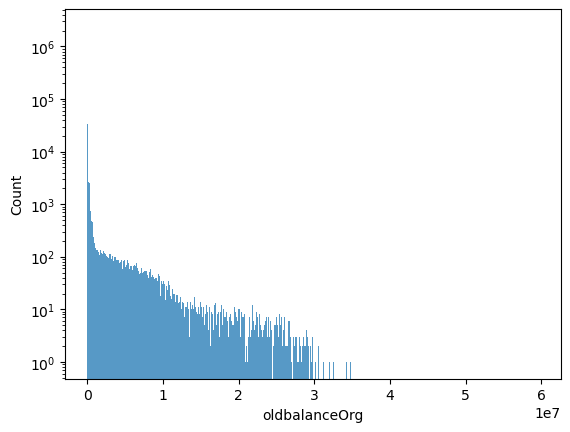

In [27]:
# histogram of origin accounts balance before the transaction
sns.histplot(df["oldbalanceOrg"], log=True)

<Axes: xlabel='newbalanceOrig', ylabel='Count'>

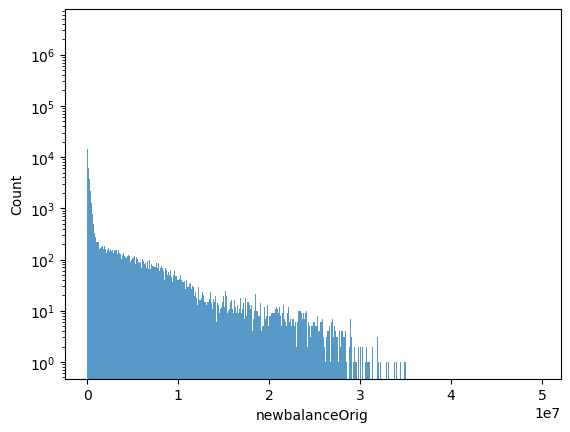

In [29]:
# histogram of origin accounts balance after the transaction
sns.histplot(df['newbalanceOrig'], log=True)

<Axes: xlabel='oldbalanceDest', ylabel='Count'>

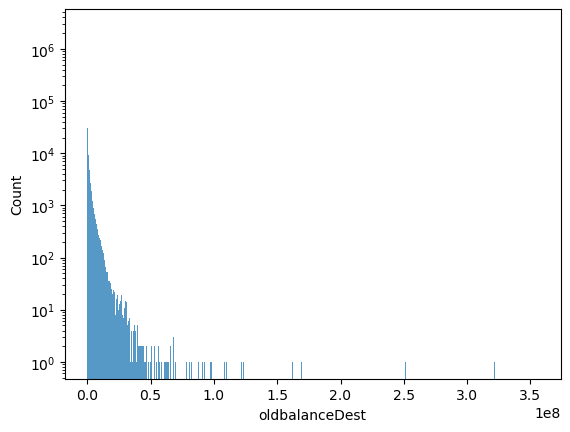

In [31]:
# histogram of destination accounts balance before the transaction
sns.histplot(df['oldbalanceDest'], log=True)

<Axes: xlabel='newbalanceDest', ylabel='Count'>

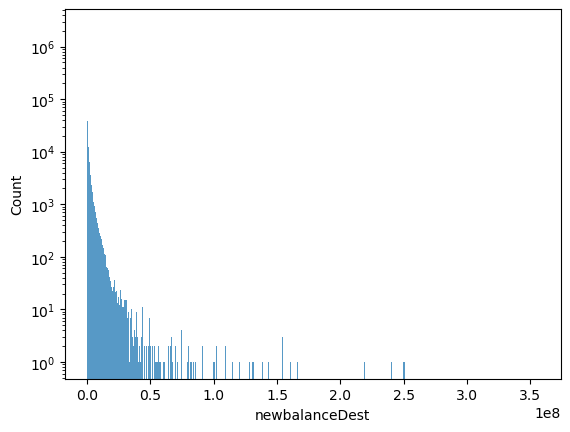

In [32]:
# histogram of destination accounts balance after the transaction
sns.histplot(df['newbalanceDest'], log=True)

<Axes: xlabel='isFlaggedFraud', ylabel='Count'>

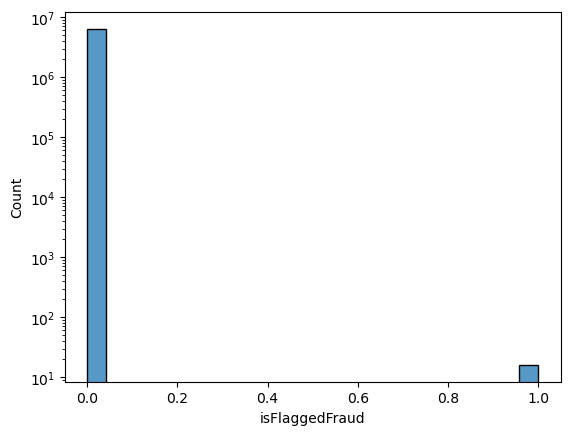

In [37]:
# horizontal barplot of column "isFlaggedFraud"
sns.histplot(df['isFlaggedFraud'], log=True)
#df['isFlaggedFraud'].value_counts().plot(kind='bar')

## Bivariate Exploratory Analysis

In [ ]:
# boxplot for 'oldBalanceOrg' where hue = type

In [ ]:
# boxplot for 'newBalanceOrg' where hue = type

In [ ]:
# heatmap of variables